In [720]:
import matplotlib.pyplot as plt
import sys
sys.path.append('../src')
from PorousMediaLab import PorousMediaLab
import numpy as np
%matplotlib inline

In [721]:
tend = 0.8 ## hours
dt = 0.01
dx = 0.1 ## cm
L = 10 ## cm
x = np.linspace(0, L, L / dx + 1)
t = np.linspace(0, tend, round(tend / dt) + 1)
phi =  ( 0.98 - 0.8 ) * np.exp( -x / 1 ) + 0.8

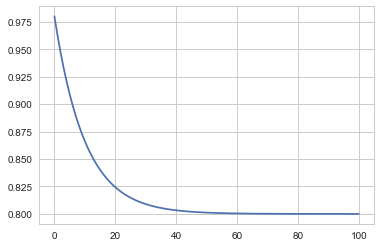

In [722]:
plt.plot(phi)

In [723]:
ftc = PorousMediaLab(L, dx, tend, dt, phi, w=0)

In [724]:
C_init=0.0000001/phi/3
ftc.add_species(is_solute=True, element='H2CO3', D=4, init_C=C_init, bc_top=1e-2, bc_top_type='flux', bc_bot=0, bc_bot_type='dirichlet')
ftc.add_species(is_solute=True, element='HCO3', D=4, init_C=C_init, bc_top=1e-2, bc_top_type='flux', bc_bot=0, bc_bot_type='dirichlet')
ftc.add_species(is_solute=True, element='CO3', D=4, init_C=C_init, bc_top=1e-2, bc_top_type='flux', bc_bot=0, bc_bot_type='dirichlet')
ftc.add_acid(species=['H2CO3', 'HCO3', 'CO3'], pKa=[3.6, 10.32])

# ftc.add_species(is_solute=True, element='H3PO4', D=1e-5*60*60, init_C=C_init, bc_top=0.01, bc_top_type='dirichlet', bc_bot=0.001, bc_bot_type='flux')
# ftc.add_species(is_solute=True, element='H2PO4', D=1e-5*60*60, init_C=C_init, bc_top=0.01, bc_top_type='dirichlet', bc_bot=0.001, bc_bot_type='flux')
# ftc.add_species(is_solute=True, element='HPO4', D=1e-5*60*60, init_C=C_init, bc_top=0.01, bc_top_type='dirichlet', bc_bot=0.001, bc_bot_type='flux')
# ftc.add_species(is_solute=True, element='PO4', D=1e-5*60*60, init_C=C_init, bc_top=0.01, bc_top_type='dirichlet', bc_bot=0.001, bc_bot_type='flux')


ftc.add_species(is_solute=True, element='Ca', D=4, init_C=1e-8, bc_top=0., bc_top_type='flux', bc_bot=1e-2, bc_bot_type='flux')
ftc.add_species(is_solute=False, element='CaCO3', D=1e-8, init_C=0., bc_top=0.0, bc_top_type='flux', bc_bot=0.00, bc_bot_type='flux')


# ftc.add_acid(species=['H3PO4', 'H2PO4', 'HPO4', 'PO4'], pKa=[2.148, 7.198, 12.319])
ftc.add_ion(element='Ca', charge=2)

In [725]:
ftc.constants['Ks'] = 5e-9
ftc.constants['k_dis'] = 1e-2
ftc.constants['k_pre'] = 1e-1
ftc.constants['CF'] = (1-phi)/phi  ### conversion factor

In [726]:
ftc.rates['R_dis'] = 'k_dis * CaCO3 * (1-Ks/(Ca+1e-8)/(CO3+1e-8))'
ftc.rates['R_pre'] = 'k_pre  * Ca * (Ca*CO3/Ks-1)'

In [727]:
ftc.dcdt['CaCO3'] = '-R_dis/CF + R_pre/CF'
ftc.dcdt['Ca'] = 'R_dis*CF - R_pre*CF'
ftc.dcdt['CO3'] = 'R_dis*CF - R_pre*CF'

In [728]:
# %%timeit
ftc.solve()

Simulation starts  with following params:
	tend = 0.8,
	dt = 1.00e-02,
	L = 10.0,
	dx = 1.00e-01,
	w = 0.00
Simulation started:
	 2017-08-15 02:07:21


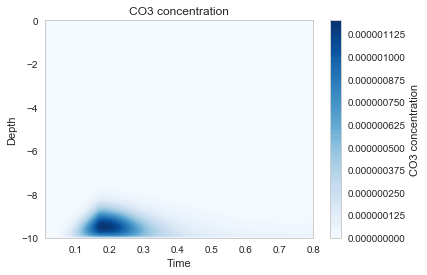

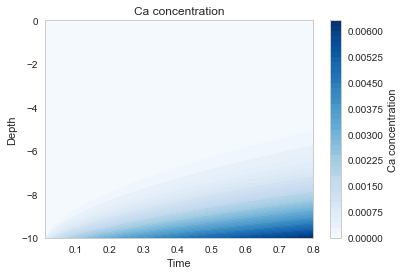

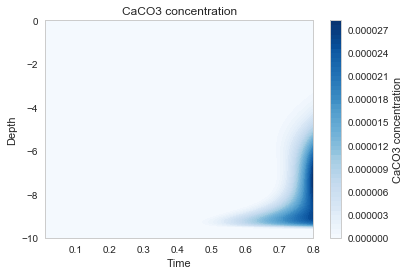

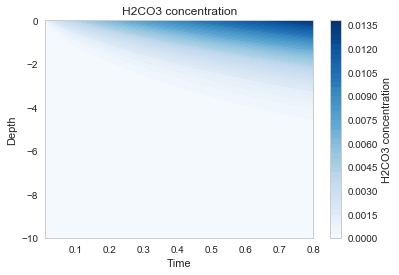

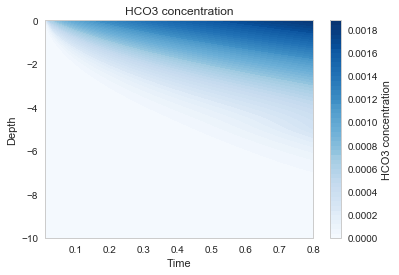

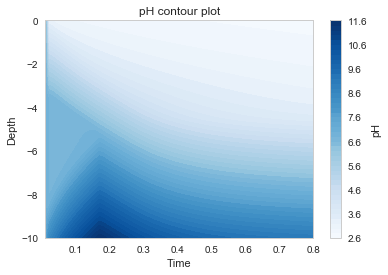

In [729]:
ftc.plot_contourplots(labels=False)

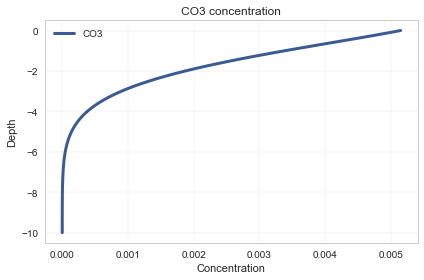

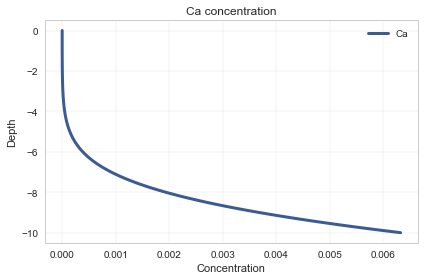

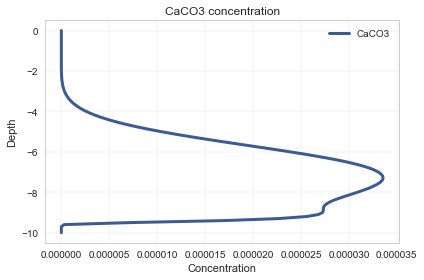

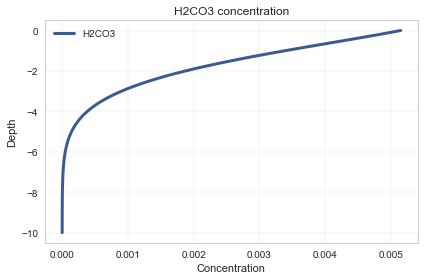

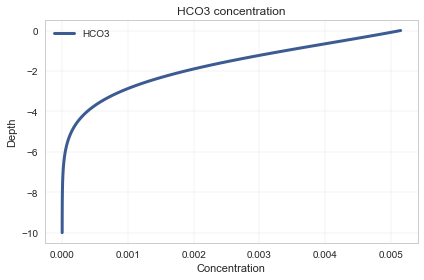

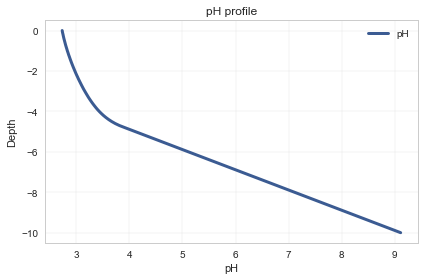

In [730]:
ftc.plot_profiles()

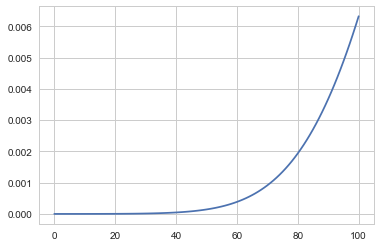

In [731]:
plt.plot(ftc.profiles.Ca)

In [732]:
>>> from pHcalc import Acid, Neutral, System
>>> carbonic = Acid(pKa=[3.6, 10.32], charge=0, conc=0.0000001)
>>> system = System(carbonic)
>>> system.pHsolve()
>>> print(system.pH) # Should print 2.8343772

6.79108200073


In [733]:
>>> from scipy.sparse import spdiags
>>> data = np.array([[1, 2, 3, 4], [1, 2, 3, 4], [1, 2, 3, 4]])
>>> diags = np.array([-1, 0, 1])
>>> spdiags(data, diags, 4, 4).toarray()

array([[1, 2, 0, 0],
       [1, 2, 3, 0],
       [0, 2, 3, 4],
       [0, 0, 3, 4]])